In [1]:
### Time Series Experis

In [2]:
###! pip install kaggle

In [3]:
###!pip install pandas-datareader

In [4]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [5]:
#!pip install pycryptodome pycryptodomex
#!pip uninstall pandas-datareader
#!pip install git+https://github.com/raphi6/pandas-datareader.git@ea66d6b981554f9d0262038aef2106dda7138316

In [6]:
import datetime as dt
import yfinance as yf

company = 'MAN'

# Define a start date and End Date
start = dt.datetime(2015,1,1)
end =  dt.datetime(2023,4,4)

In [7]:
# Read Stock Price Data 
data = yf.download(company, start , end ,ignore_tz=True)

data.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-21,81.180000,81.519997,80.300003,81.050003,81.050003,265700
2023-03-22,81.230003,81.230003,77.349998,77.410004,77.410004,347700
2023-03-23,77.519997,79.730003,77.389999,77.919998,77.919998,399300
2023-03-24,77.080002,78.419998,76.620003,78.040001,78.040001,287700
2023-03-27,79.120003,79.430000,78.349998,78.900002,78.900002,190000
2023-03-28,78.559998,79.720001,78.160004,79.360001,79.360001,160800
2023-03-29,80.199997,81.430000,80.199997,81.209999,81.209999,313700
2023-03-30,82.139999,82.430000,81.000000,81.209999,81.209999,193200
2023-03-31,81.830002,82.540001,81.529999,82.529999,82.529999,242500


In [8]:
data.shape

(2077, 6)

In [9]:
####! pip install tensorflow

In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
tf.random.set_seed(123)
np.random.seed(123)

In [11]:

import pandas as pd
#import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [12]:
data.to_csv("/content/manpower.csv")

In [13]:
df=pd.read_csv('/content/manpower.csv', parse_dates=['Date'], index_col ="Date")
df.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,68.550003,68.809998,66.709999,67.470001,56.032032,346800
2015-01-05,66.919998,67.120003,64.949997,65.879997,54.711567,587400
2015-01-06,66.190002,66.459999,63.980000,65.320000,54.246513,791700


In [14]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [15]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2.077000e+03
mean,90.385373,91.442585,89.308508,90.377843,81.765518,5.764965e+05
std,16.201886,16.193432,16.147705,16.164064,15.453887,3.428974e+05
min,50.919998,54.820000,49.570000,51.669998,47.568707,5.200000e+04
25%,78.470001,79.570000,77.610001,78.599998,70.108559,3.643000e+05
50%,88.489998,89.599998,87.320000,88.550003,79.809998,5.069000e+05
75%,98.050003,98.989998,97.089996,98.050003,89.770180,7.019000e+05
max,135.460007,136.929993,134.350006,136.020004,119.406136,5.424100e+06


In [16]:
# Basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # generating random numbers
import datetime # manipulating date formats
# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots
# TIME SERIES
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
# settings
import warnings
warnings.filterwarnings("ignore")

In [17]:
monthly_high = df["High"].resample('M').sum()

In [18]:
monthly_open = df["Open"].resample('M').sum()

In [19]:
monthly_Close = df["Close"].resample('M').sum()

In [20]:
monthly_Volume = df["Volume"].resample('M').sum()

In [21]:
monthly_high = pd.DataFrame(monthly_high)

In [22]:
monthly_high = monthly_high.reset_index()

In [23]:

monthly_high['weekday'] = monthly_high['Date'].apply(lambda x: x.weekday())
monthly_high.head()

,Date,High,weekday
0,2015-01-31,1350.159988,5
1,2015-02-28,1483.560005,5
2,2015-03-31,1858.719994,1
3,2015-04-30,1798.799995,3
4,2015-05-31,1718.530006,6


In [24]:

monthly_high['month']=monthly_high['Date'].dt.month 
monthly_high.head()

,Date,High,weekday,month
0,2015-01-31,1350.159988,5,1
1,2015-02-28,1483.560005,5,2
2,2015-03-31,1858.719994,1,3
3,2015-04-30,1798.799995,3,4
4,2015-05-31,1718.530006,6,5


In [25]:

monthly_high['day']=monthly_high['Date'].dt.day 
monthly_high.head()

,Date,High,weekday,month,day
0,2015-01-31,1350.159988,5,1,31
1,2015-02-28,1483.560005,5,2,28
2,2015-03-31,1858.719994,1,3,31
3,2015-04-30,1798.799995,3,4,30
4,2015-05-31,1718.530006,6,5,31


In [26]:

train_month = monthly_high.groupby(["month", "weekday"])['High'].mean().reset_index()
train_month = train_month.pivot('weekday','month','High')
train_month.sort_index(inplace=True)

In [27]:

train_month.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
weekday,,,,,,,,,,,,
0,2092.819992,1811.975010,NaN,2347.570000,2463.720001,NaN,2288.190018,1753.139996,1708.220001,1560.449993,1765.424999,1344.939972
1,1814.695004,1773.924999,1675.875000,1887.850006,1791.190010,1778.299992,1872.119995,2665.410004,NaN,2712.970009,2117.570023,2019.279991
2,2775.989990,2338.260010,2326.969994,NaN,2275.499992,2677.879990,2051.529999,1717.730003,1667.049995,1832.009995,1763.055000,NaN
3,1514.550018,1580.399986,1986.600010,1581.979998,2101.100006,1692.999996,NaN,2505.170006,2446.710014,2004.830009,2674.250008,1960.169987
4,2053.360008,NaN,2111.730007,2356.179993,2044.250023,2353.639984,1792.015007,2113.040009,1488.505013,NaN,1693.420006,2105.939995


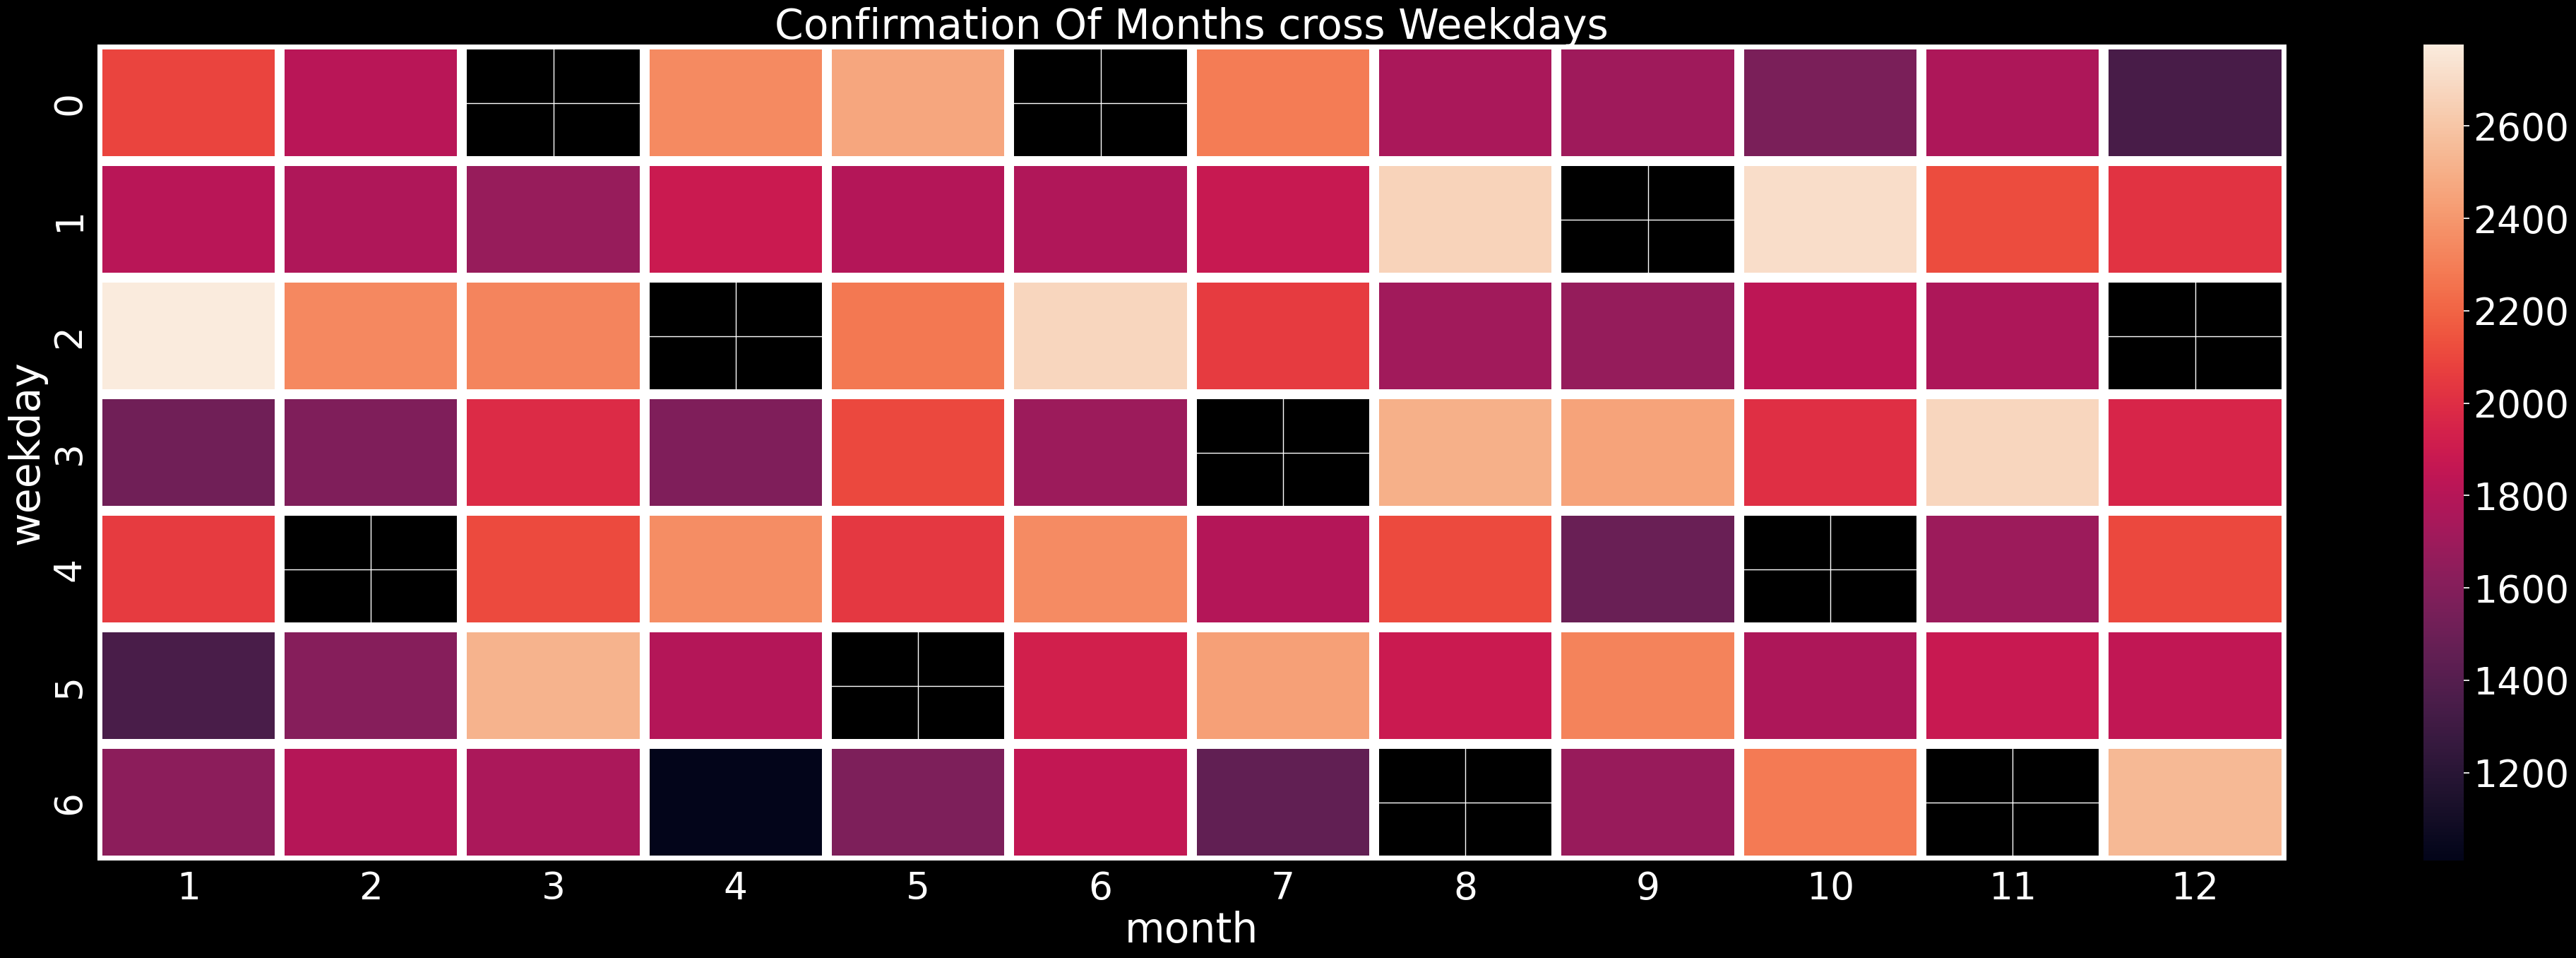

In [28]:
import seaborn as sns

sns.set(font_scale=3.5)
plt.style.use('dark_background')
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(50, 15))
sns.heatmap(train_month, annot=False, ax=ax, fmt="d", linewidths=10)
plt.title('Confirmation Of Months cross Weekdays')
plt.show()

<Axes: >

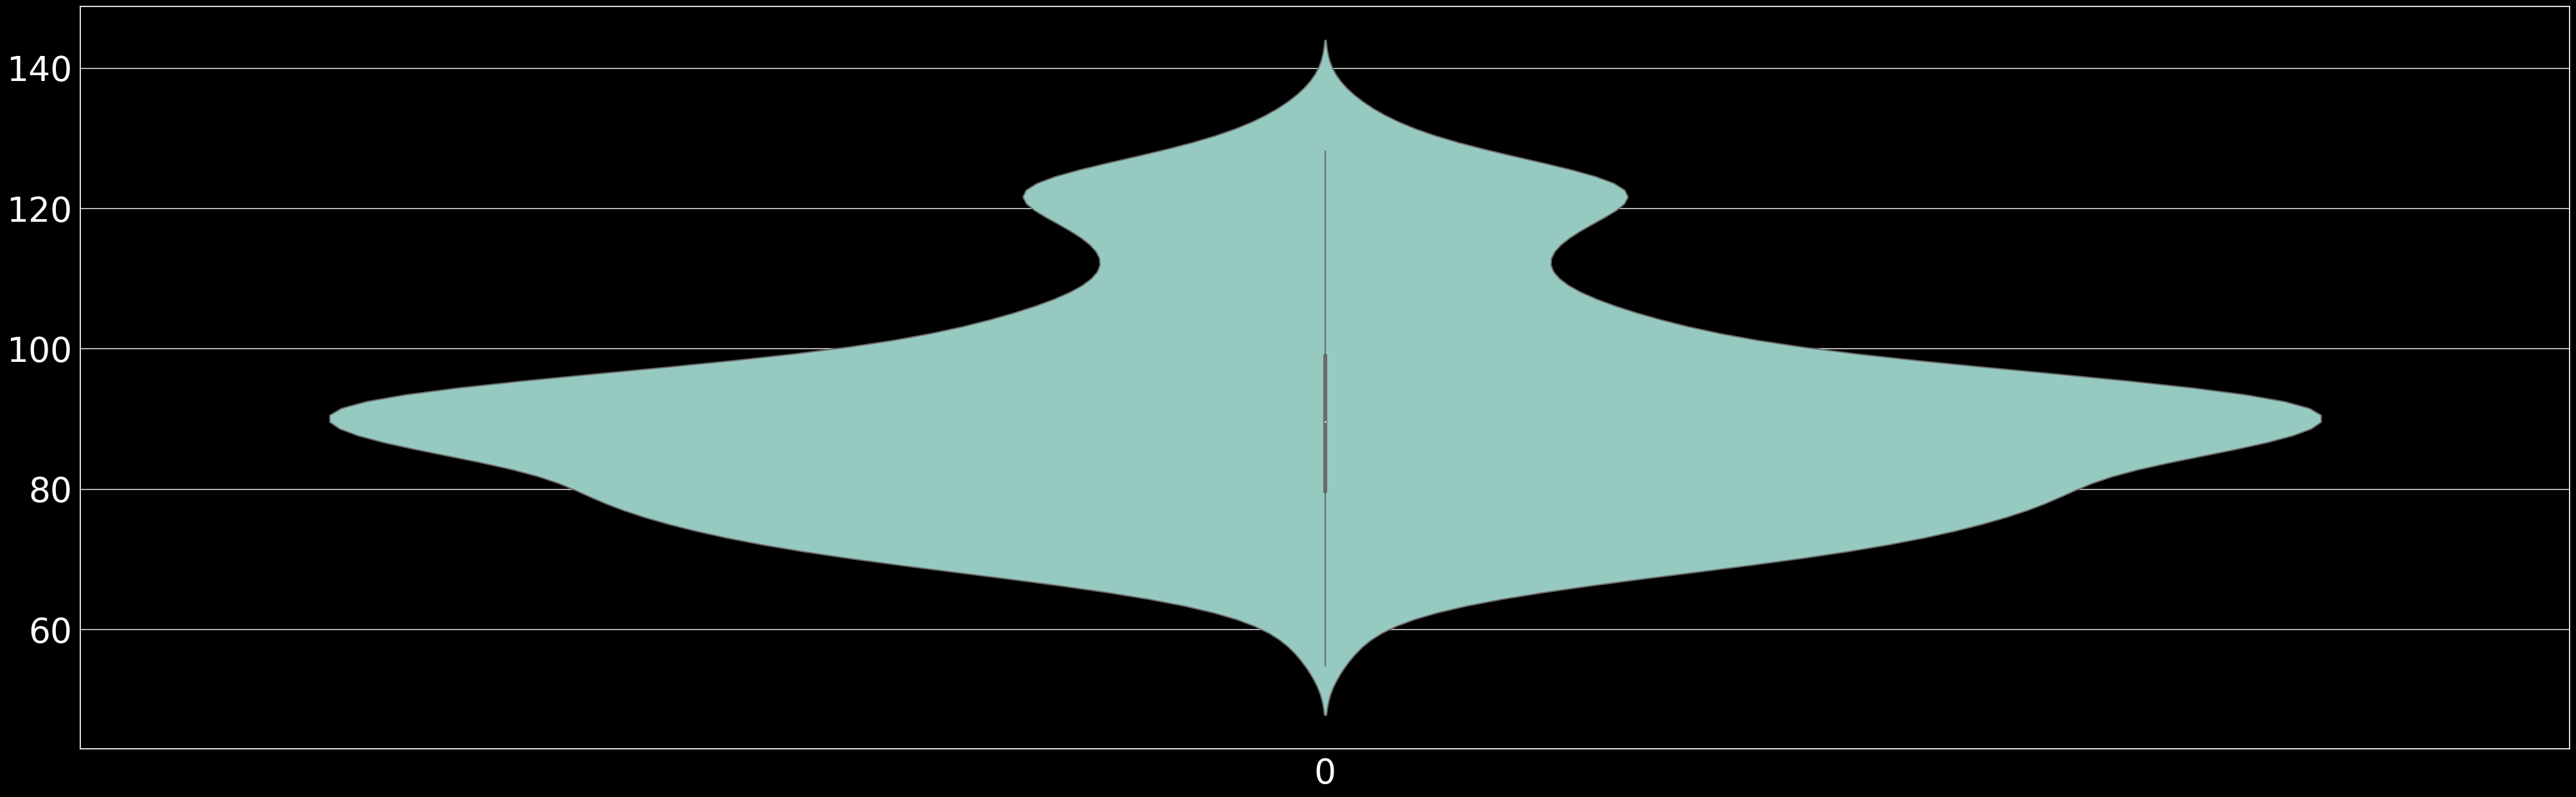

In [29]:

plt.figure(figsize=(50,15))
plt.style.use('dark_background')
sns.violinplot(df['High'])

In [30]:
monthly_high.head(10)

,Date,High,weekday,month,day
0,2015-01-31,1350.159988,5,1,31
1,2015-02-28,1483.560005,5,2,28
2,2015-03-31,1858.719994,1,3,31
3,2015-04-30,1798.799995,3,4,30
4,2015-05-31,1718.530006,6,5,31
5,2015-06-30,1959.079987,1,6,30
6,2015-07-31,2019.840012,4,7,31
7,2015-08-31,1927.259995,0,8,31
8,2015-09-30,1817.609978,2,9,30
9,2015-10-31,1903.770004,5,10,31


In [31]:
train_days = monthly_high.groupby(["month", "day"])['High'].mean().reset_index()
train_days = train_days.pivot('day','month','High')
train_days.sort_index(inplace=True)
train_days.dropna(inplace=True)

In [32]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [33]:
###! pip install plotly

In [34]:

import plotly
# plotly.tools.set_credentials_file()


In [35]:
# Show Rolling mean, Rolling Std and Test for the stationnarity
df_date_index = monthly_high[['Date','High']].set_index('Date')
df_date_index.head()

,High
Date,
2015-01-31,1350.159988
2015-02-28,1483.560005
2015-03-31,1858.719994
2015-04-30,1798.799995
2015-05-31,1718.530006


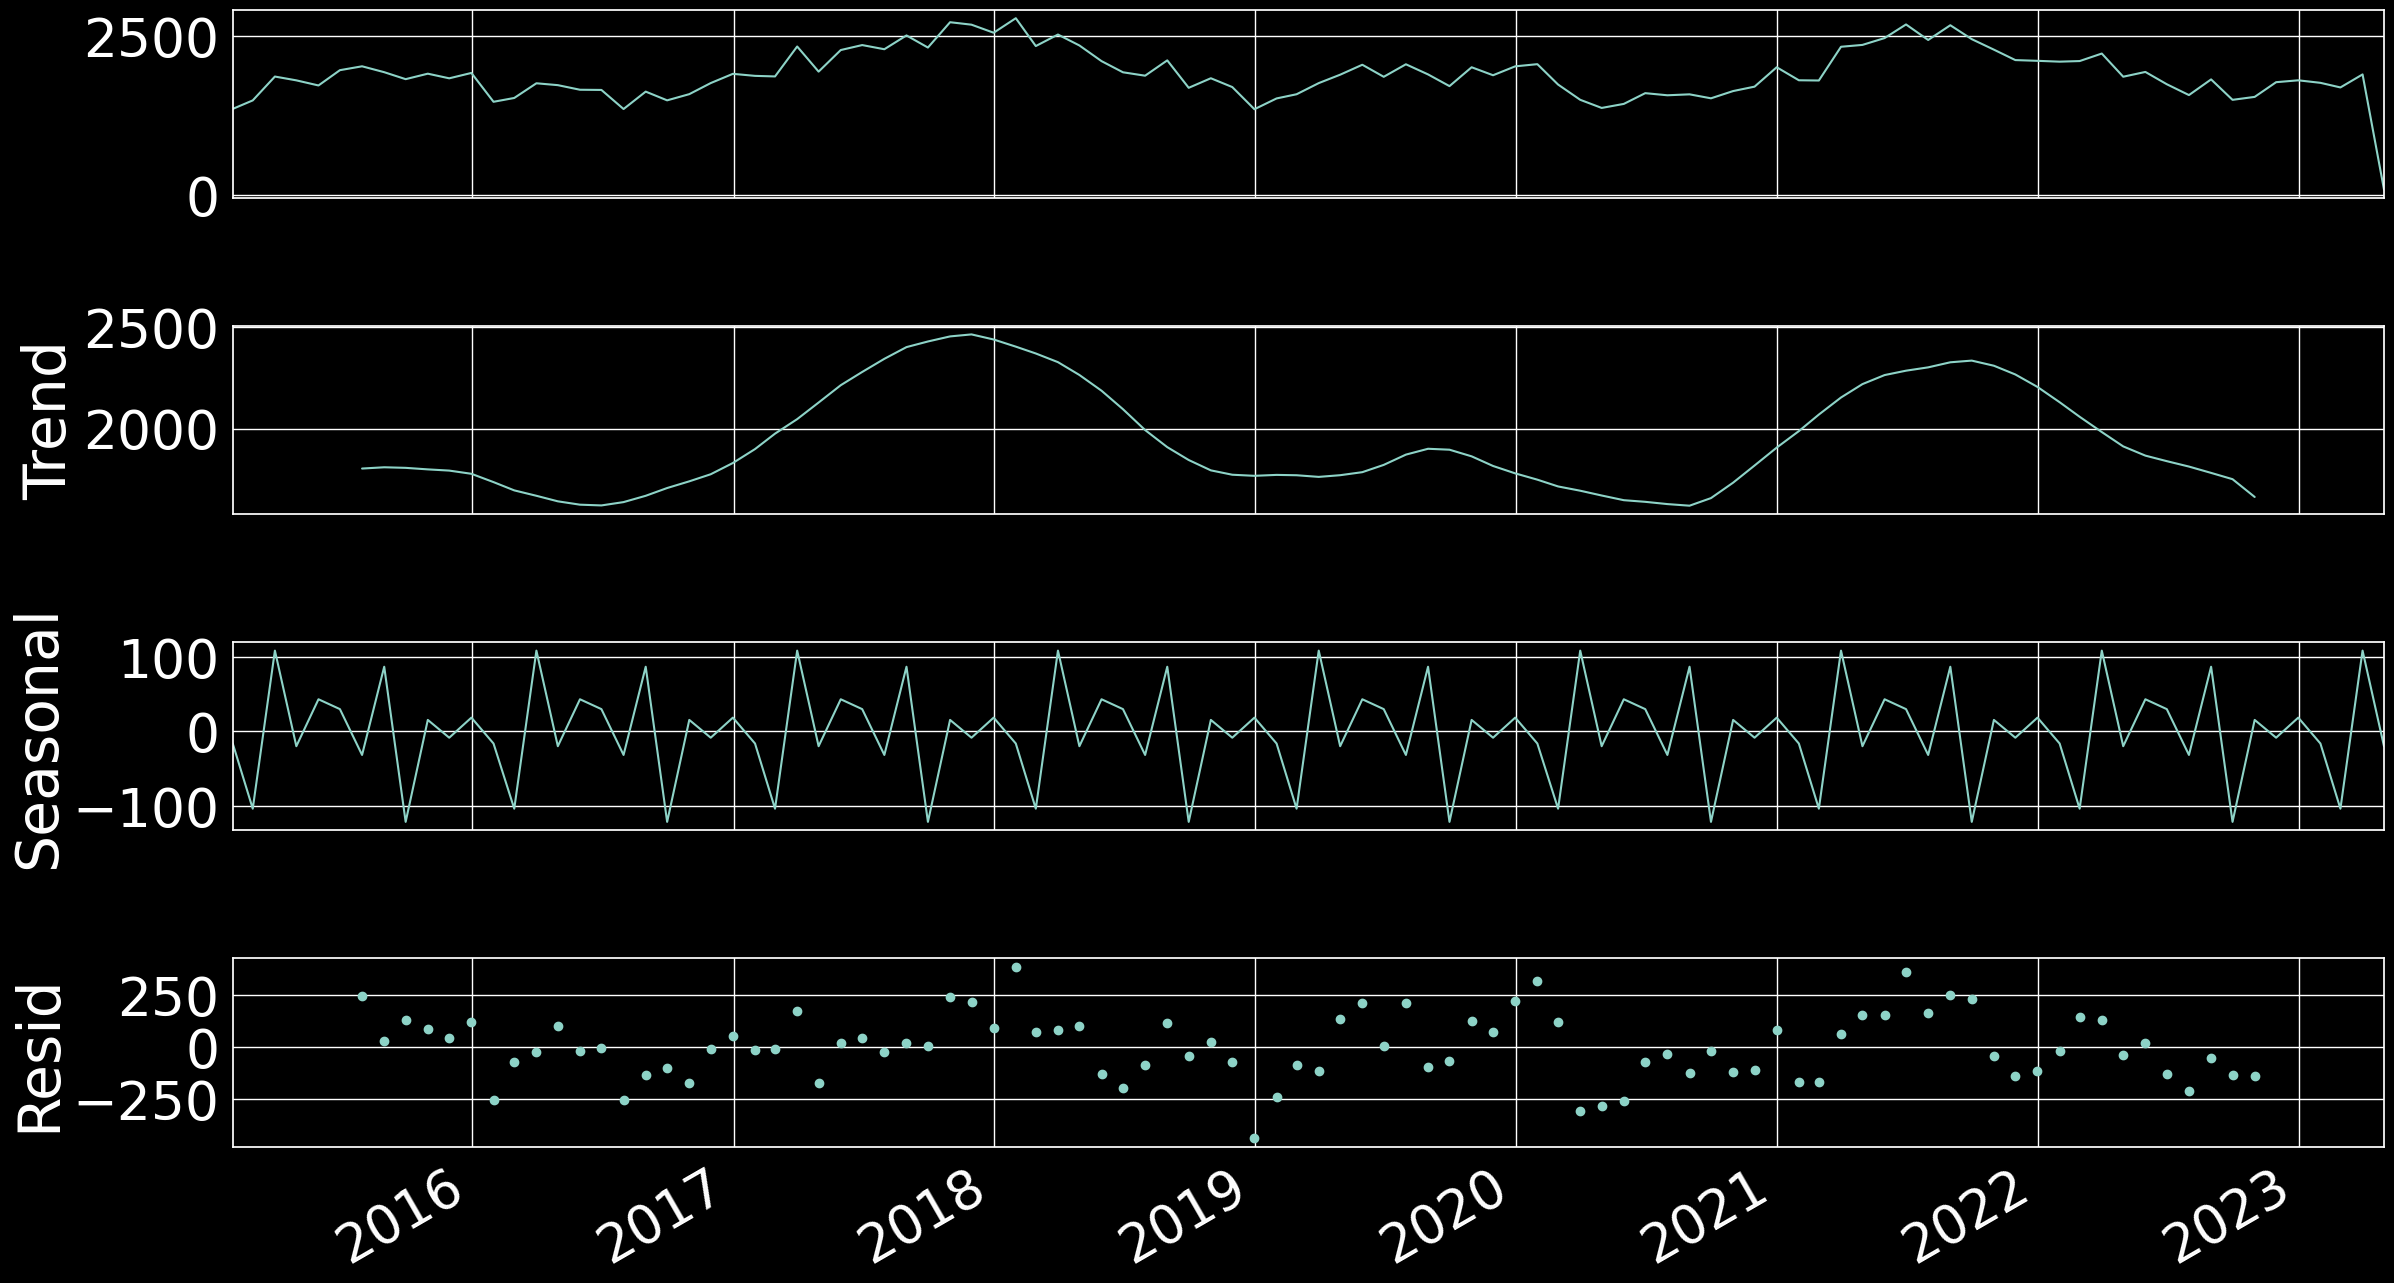

In [36]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 15
decomposition = sm.tsa.seasonal_decompose(df_date_index, model='additive')
fig = decomposition.plot()
fig.autofmt_xdate()
plt.show()

#### <b> <u> Stationarity </u> </b>
A Time Series is said to be stationary if its statistical properties such as mean, variance remain constant over time.
Most of the Time Series models work on the assumption that the TS is stationary. Major reason for this is that there are many ways in which a series can be non-stationary, but only one way for stationarity. <br>
Intuitively, we can say that if a Time Series has a particular behaviour over time, there is a very high probability that it will follow the same in the future.<br>
Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.
<br>

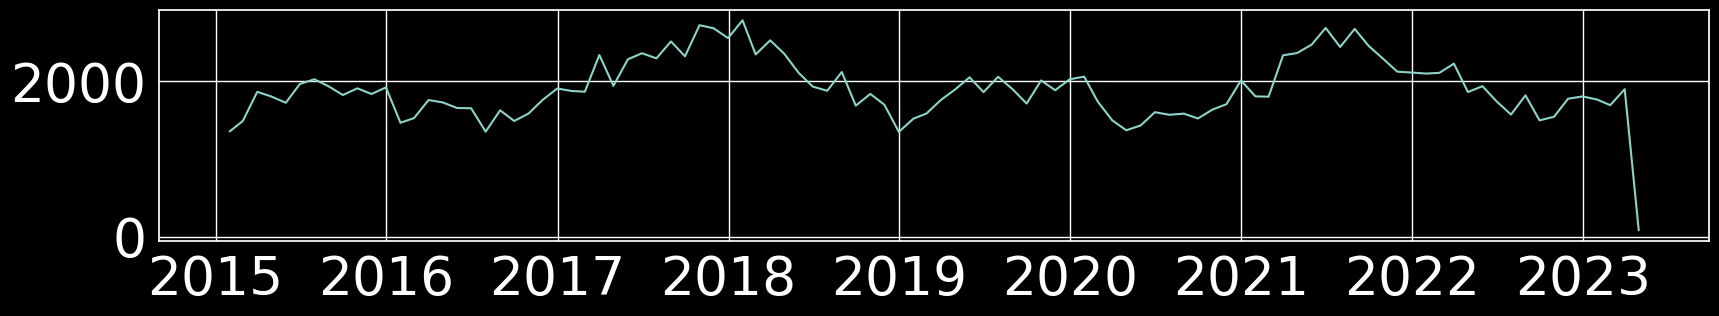

In [37]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(df_date_index)
fig.autofmt_xdate()

In [38]:

### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)
     


###  AD FULLER TEST

In [39]:
df_date_index.columns

Index(['High'], dtype='object')

In [40]:
adf_test(df_date_index['High'])

1. ADF :  -2.346440561085355
2. P-Value :  0.15742692227189314
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 89
5. Critical Values :
	 1% :  -3.506057133647011
	 5% :  -2.8946066061911946
	 10% :  -2.5844100201994697


In [41]:
df_date_index['High_First_Order_Differencing'] = df_date_index['High'] - df_date_index['High'].shift(1)

In [42]:
adf_test(df_date_index['High_First_Order_Differencing'].dropna())

1. ADF :  -3.8042896313506604
2. P-Value :  0.0028637301187774055
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 96
5. Critical Values :
	 1% :  -3.5003788874873405
	 5% :  -2.8921519665075235
	 10% :  -2.5830997960069446


In [43]:
df_date_index['High_Second_Order_Differencing'] = df_date_index['High_First_Order_Differencing'] - df_date_index['High_First_Order_Differencing'].shift(1)

In [44]:
adf_test(df_date_index['High_Second_Order_Differencing'].dropna())

1. ADF :  -5.662340539235939
2. P-Value :  9.317942839696368e-07
3. Num Of Lags :  5
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 92
5. Critical Values :
	 1% :  -3.503514579651927
	 5% :  -2.893507960466837
	 10% :  -2.583823615311909


In [45]:
def adfuller_test(confirmed):
    
    result=adfuller(confirmed)
 
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
 
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:    
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [46]:

adfuller_test(df_date_index['High'].dropna())

ADF Test Statistic : -2.346440561085355
p-value : 0.15742692227189314
#Lags Used : 10
Number of Observations Used : 89
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [47]:

adfuller_test(df_date_index['High_First_Order_Differencing'].dropna())

ADF Test Statistic : -3.8042896313506604
p-value : 0.0028637301187774055
#Lags Used : 2
Number of Observations Used : 96
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


### Plotting ACF and PACF

###### Autocorrelation and Partial Autocorrelation Functions  <br>
• Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value. <br>
• Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags. <br>

In [48]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [49]:
df_date_index.columns

Index(['High', 'High_First_Order_Differencing',
       'High_Second_Order_Differencing'],
      dtype='object')

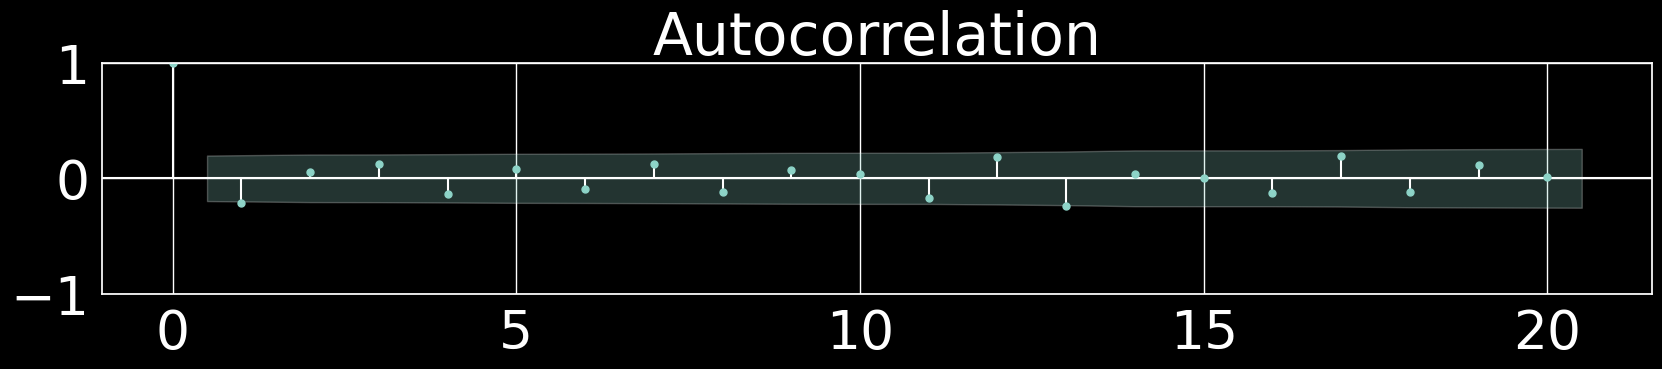

In [50]:
acf2 = plot_acf(df_date_index['High_First_Order_Differencing'].dropna())

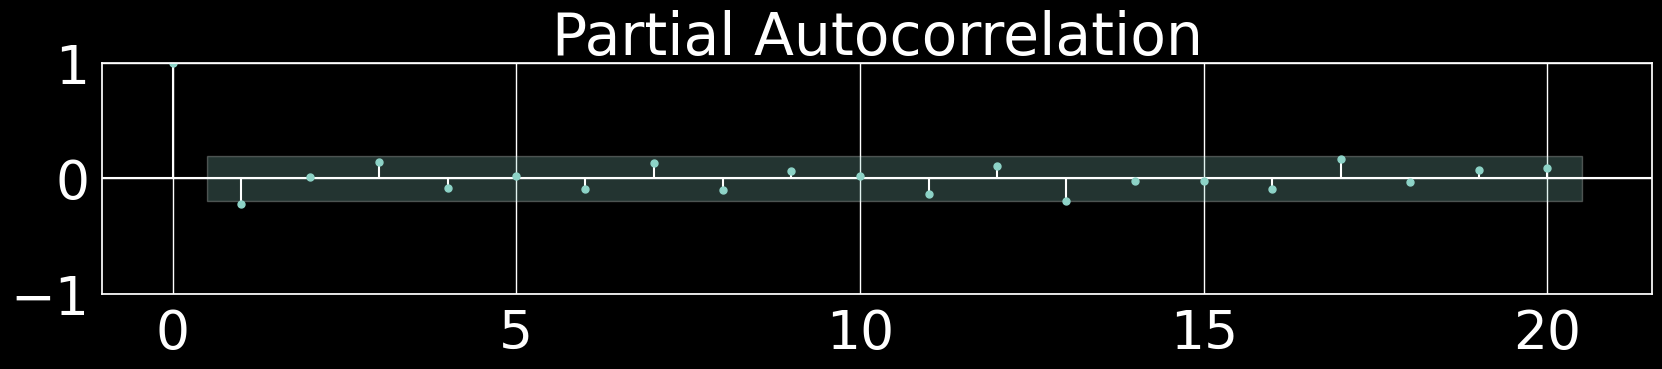

In [51]:
result1 = plot_pacf(df_date_index["High_First_Order_Differencing"].dropna())

In [52]:

print(df_date_index.shape)
train=df_date_index.iloc[:-30]
test=df_date_index.iloc[-30:]
print(train.shape,test.shape)
### print(test.iloc[0],test.iloc[-1])
     

(100, 3)
(70, 3) (30, 3)


In [53]:
train.columns

Index(['High', 'High_First_Order_Differencing',
       'High_Second_Order_Differencing'],
      dtype='object')

In [54]:
from statsmodels.tsa.arima.model   import ARIMA
model_ARIMA=ARIMA(train['High_First_Order_Differencing'],order=(0,2,0))

In [55]:

model_Arima_fit=model_ARIMA.fit()

In [56]:

model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:     High_First_Order_Differencing   No. Observations:                   70
Model:                            ARIMA(0, 2, 0)   Log Likelihood                -533.564
Date:                           Sat, 15 Apr 2023   AIC                           1069.128
Time:                                   17:09:33   BIC                           1071.347
Sample:                               01-31-2015   HQIC                          1070.007
                                    - 10-31-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.806e+05   6.89e+04      5.527      0.000    2.46e+05    5.16e+05
===================================================================================
Ljung-Box (L1) (Q):                  38.58   Jarque-Bera (JB):                 0.16
Prob(Q):                              0.00   Prob(JB):                         0.92
Heteroskedasticity (H):               0.81   Skew:                             0.08
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:

##prediction
pred_start_date=test.index[0]
pred_end_date=test.index[-1]
print(pred_start_date)
print(pred_end_date)

2020-11-30 00:00:00
2023-04-30 00:00:00


In [58]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)


In [59]:
test.columns

Index(['High', 'High_First_Order_Differencing',
       'High_Second_Order_Differencing'],
      dtype='object')

In [60]:
residuals=test['High_First_Order_Differencing']- pred

In [61]:
residuals.head(3)

Date
2020-11-30   -221.269974
2020-12-31   -162.259956
2021-01-31   -848.669914
dtype: float64

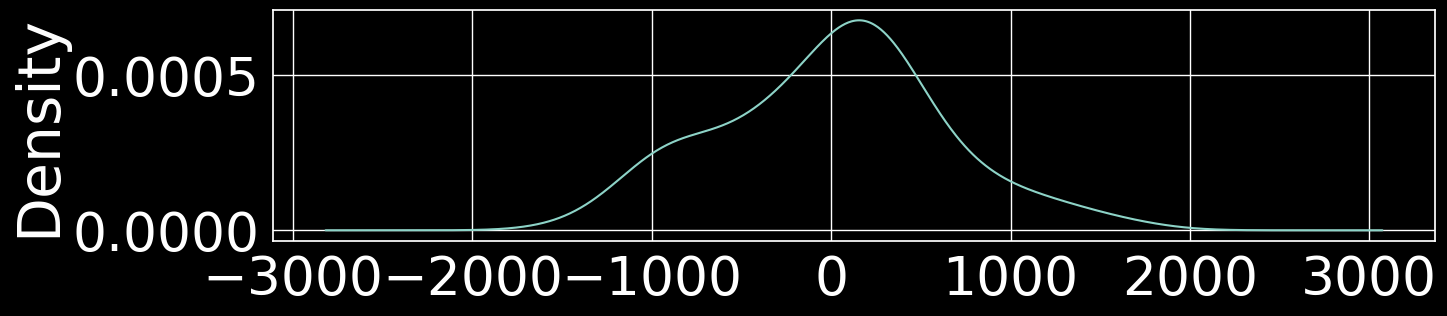

In [62]:
plt.figure(figsize=[15, 3])
model_Arima_fit.resid.plot(kind='kde')
plt.show()

In [63]:
test['Predicted_ARIMA']=pred

In [64]:
test.columns

Index(['High', 'High_First_Order_Differencing',
       'High_Second_Order_Differencing', 'Predicted_ARIMA'],
      dtype='object')

In [65]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [66]:
from math import sqrt

In [67]:
# report performance
mse = mean_squared_error(test["High_First_Order_Differencing"], test["Predicted_ARIMA"])
rmse = sqrt(mse)
print('ARIMA RMSE: {}, MSE:{}'.format(rmse,mse))

##plt.title('RMSE: %.4f'% rmse)


ARIMA RMSE: 3362.314513971152, MSE:11305158.890861062


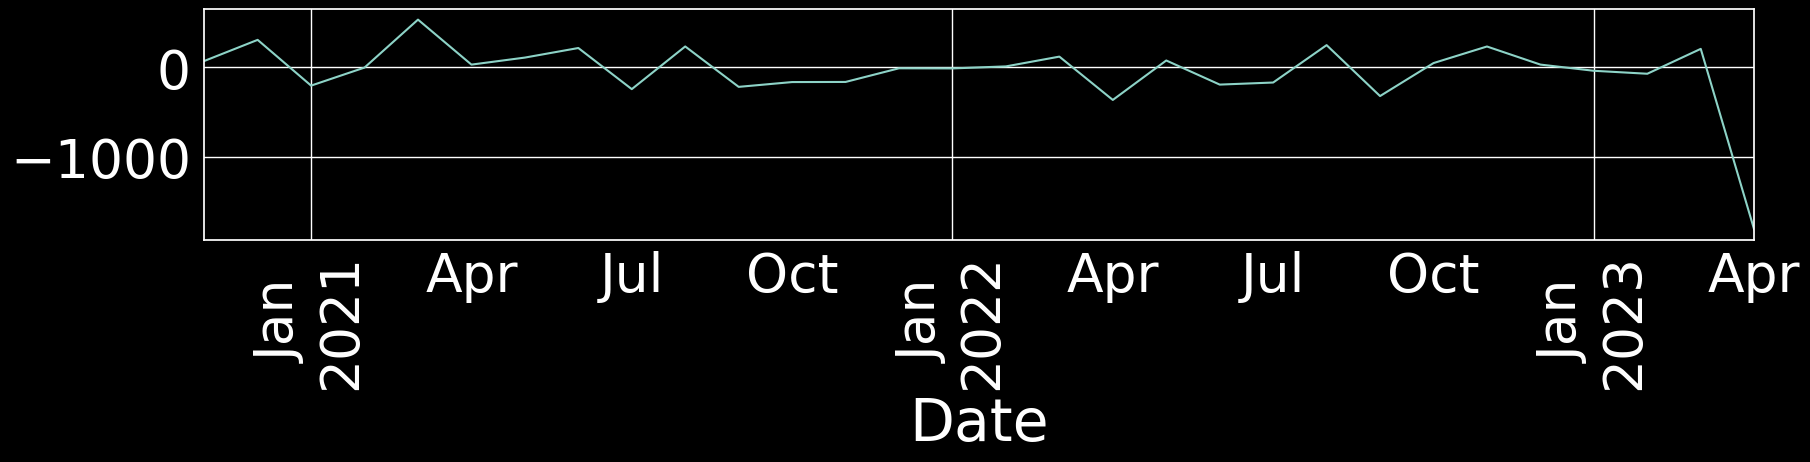

In [68]:

start=len(train)
end=len(train)+len(test)-1
#plt.figure(figsize=[10,2])
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model_Arima_fit.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
#pred.plot(legend=True)
test['High_First_Order_Differencing'].plot(legend=False)
plt.xticks(rotation="vertical")
plt.show()


In [69]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [70]:
df.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,68.550003,68.809998,66.709999,67.470001,56.032032,346800
2015-01-05,66.919998,67.120003,64.949997,65.879997,54.711567,587400


In [71]:
df = df.reset_index()

In [72]:
final = df[["Date","High"]]

In [73]:
final.columns

Index(['Date', 'High'], dtype='object')

In [74]:
y = pd.Series(data=final['High'].values, index=final['Date'])

In [75]:
y.head(3)

Date
2015-01-02    68.809998
2015-01-05    67.120003
2015-01-06    66.459999
dtype: float64

In [76]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [77]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_result = [0, 0, 1000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            print('ARIMA{} x {} - AIC: {}'.format(param, param_seasonal, results.aic))

            if results.aic < best_result[2]:
                best_result = [param, param_seasonal, results.aic]
        except:
            continue
            
print('\nBest Result:', best_result)


ARIMA(0, 0, 0) x (0, 0, 0, 12) - AIC: 24707.190736524728
ARIMA(0, 0, 0) x (0, 0, 1, 12) - AIC: 21948.666100502563
ARIMA(0, 0, 0) x (0, 1, 0, 12) - AIC: 13110.239466298432
ARIMA(0, 0, 0) x (0, 1, 1, 12) - AIC: 13033.434345146932
ARIMA(0, 0, 0) x (1, 0, 0, 12) - AIC: 13116.806256104233
ARIMA(0, 0, 0) x (1, 0, 1, 12) - AIC: 13113.258094298659
ARIMA(0, 0, 0) x (1, 1, 0, 12) - AIC: 13041.079532238662
ARIMA(0, 0, 0) x (1, 1, 1, 12) - AIC: 13035.434241935138
ARIMA(0, 0, 1) x (0, 0, 0, 12) - AIC: 21871.200524319884
ARIMA(0, 0, 1) x (0, 0, 1, 12) - AIC: 19191.153241130018
ARIMA(0, 0, 1) x (0, 1, 0, 12) - AIC: 11155.345257022378
ARIMA(0, 0, 1) x (0, 1, 1, 12) - AIC: 11062.265601203919
ARIMA(0, 0, 1) x (1, 0, 0, 12) - AIC: 11166.026293768886
ARIMA(0, 0, 1) x (1, 0, 1, 12) - AIC: 11194.236702465
ARIMA(0, 0, 1) x (1, 1, 0, 12) - AIC: 11075.811898147342
ARIMA(0, 0, 1) x (1, 1, 1, 12) - AIC: 11056.199123698241
ARIMA(0, 1, 0) x (0, 0, 0, 12) - AIC: 7776.3326008990625
ARIMA(0, 1, 0) x (0, 0, 1, 12) - A

In [78]:
train.columns

Index(['High', 'High_First_Order_Differencing',
       'High_Second_Order_Differencing'],
      dtype='object')

### SARIMAX <br>
The implementation is called SARIMAX instead of SARIMA because the “X” addition to the method name means that the implementation also supports exogenous variables.
Exogenous variables are optional can be specified via the “exog” argument.<br>
model = SARIMAX(data, exog=other_data, ...)<br>
Examples of exogenous variables: Population, holidays, number of airline companies, major events<br>

In [79]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(train["High_First_Order_Differencing"], order=(1, 1, 0), seasonal_order=(0, 1, 1, 12))
model_fit = model.fit(disp=False)


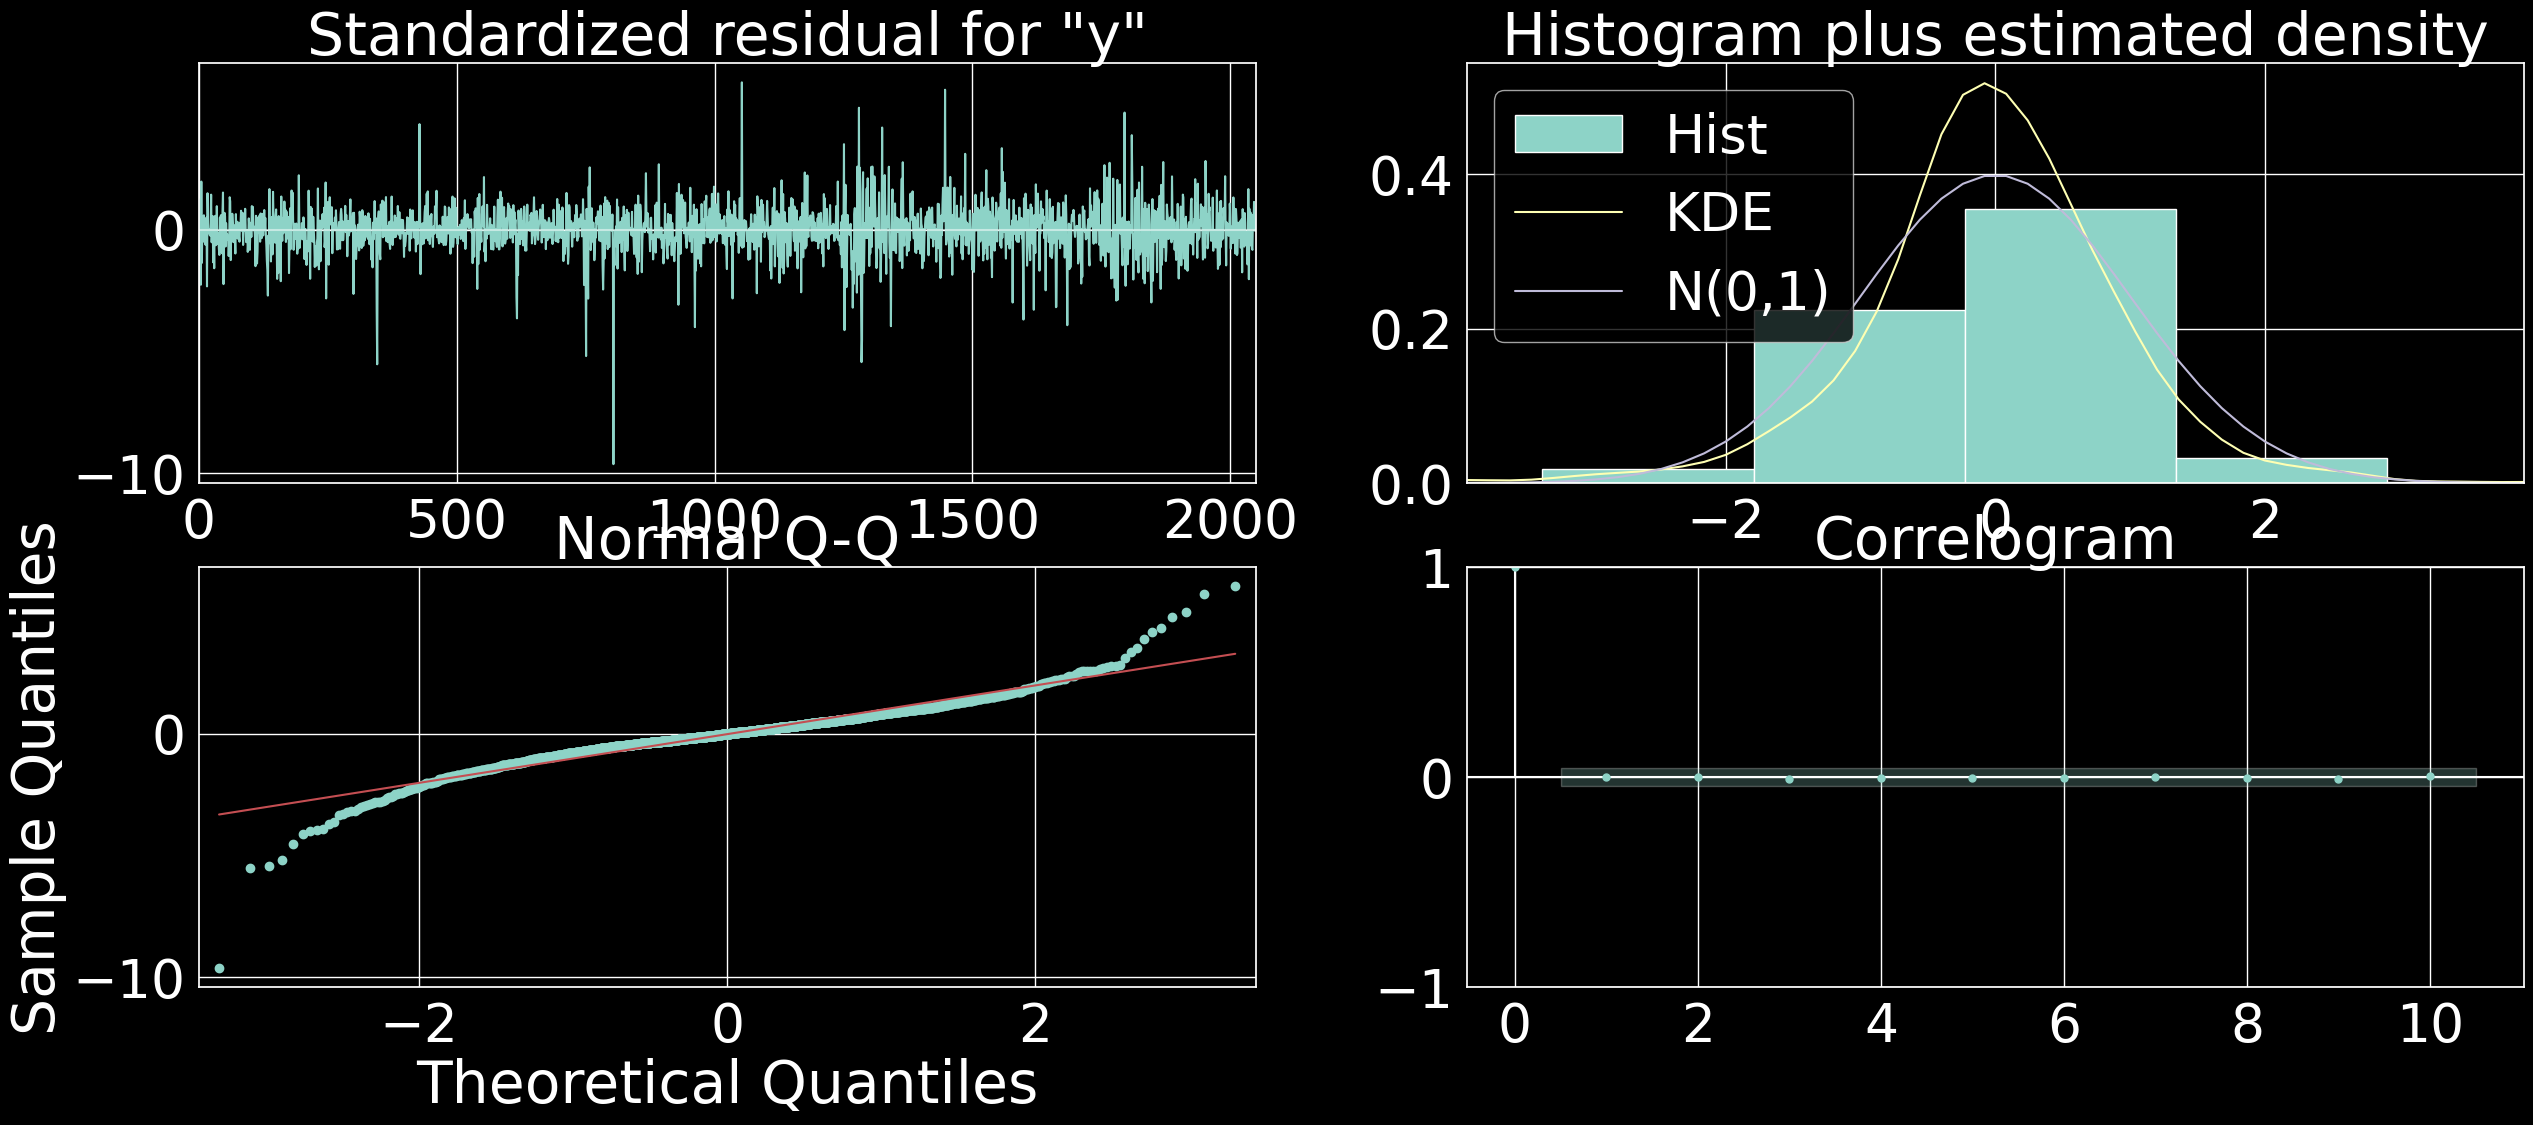

In [80]:

results.plot_diagnostics(figsize=(30, 12))
plt.show()


In [81]:
print(train.shape, test.shape)

(70, 3) (30, 4)


In [82]:


start_index = test.index.min()
end_index = test.index.max()

#Predictions
predictions = model_fit.predict(start=start_index, end=end_index)

In [83]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [84]:
from math import sqrt

In [85]:
predictions.head(3)

2020-11-30   -22.555516
2020-12-31   -76.343957
2021-01-31    52.336261
Freq: M, Name: predicted_mean, dtype: float64

In [86]:
test.columns

Index(['High', 'High_First_Order_Differencing',
       'High_Second_Order_Differencing', 'Predicted_ARIMA'],
      dtype='object')

In [87]:
test2 = test["High_First_Order_Differencing"]

In [88]:
test2.head(3)

Date
2020-11-30     69.399994
2020-12-31    305.009987
2021-01-31   -204.799995
Name: High_First_Order_Differencing, dtype: float64

In [89]:
train2 = train["High_First_Order_Differencing"]

In [90]:
train2.head(3)

Date
2015-01-31           NaN
2015-02-28    133.400017
2015-03-31    375.159988
Name: High_First_Order_Differencing, dtype: float64

In [91]:
# report performance
mse = mean_squared_error(test2[start_index:end_index], predictions)
rmse = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse,mse))


RMSE: 363.63574666894795, MSE:132230.95625548327


Text(0.5, 1.0, 'SARIMAX  RMSE: 363.6357')

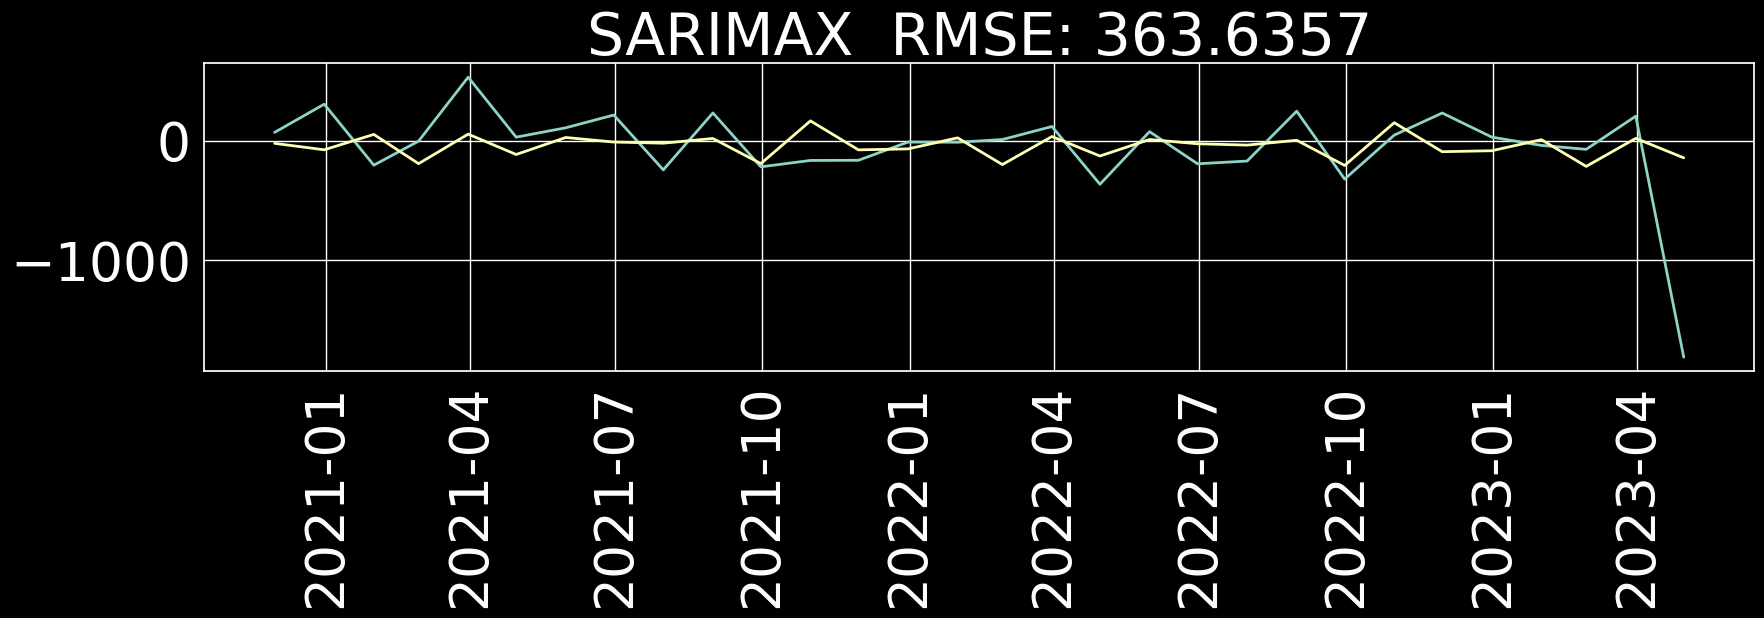

In [92]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,4)

plt.plot(test2, linewidth=2)
plt.plot(predictions, linewidth=2)
plt.xticks(rotation ='vertical')
plt.title('SARIMAX  RMSE: %.4f'% rmse)


In [93]:
####!pip install pmdarima

In [94]:
test.head(3)

,High,High_First_Order_Differencing,High_Second_Order_Differencing,Predicted_ARIMA
Date,,,,
2020-11-30,1699.959999,69.399994,-44.669998,290.669968
2020-12-31,2004.969986,305.009987,235.609993,467.269943
2021-01-31,1800.169991,-204.799995,-509.809982,643.869919


In [95]:
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

In [96]:

model=auto_arima(train["High_First_Order_Differencing"].dropna(),start_p=0,d=1,start_q=0,
          max_p=5,max_d=5,max_q=5, start_P=0,
          D=1, start_Q=0, max_P=5,max_D=5,
          max_Q=5, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=827.562, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=801.307, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=807.276, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=801.459, Time=0.28 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=798.066, Time=0.20 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=0.92 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=819.357, Time=0.14 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(1,1,0)(0,1,1)[12] intercept   : AIC=800.035, Time=0.27 sec

Best model:  ARIMA(1,1,0)(0,1,1)[12]          
Total fit tim

In [97]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model_auto = SARIMAX(train["High_First_Order_Differencing"], order=(1, 1, 0), seasonal_order=(0, 1, 1, 12))
model_auto_fit = model_auto.fit(disp=False)


In [98]:
model_auto_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:        High_First_Order_Differencing   No. Observations:                   70
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -403.677
Date:                              Sat, 15 Apr 2023   AIC                            813.354
Time:                                      17:15:09   BIC                            819.483
Sample:                                  01-31-2015   HQIC                           815.736
                                       - 10-31-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5859      0.119     -4.917      0.000      -0.819      -0.352
ma.S.L12      -0.6374      0.188     -3.392      0.001      -1.006      -0.269
sigma2      7.387e+04   2.02e+04      3.662      0.000    3.43e+04    1.13e+05
===================================================================================
Ljung-Box (L1) (Q):                   5.81   Jarque-Bera (JB):                 2.21
Prob(Q):                              0.02   Prob(JB):                         0.33
Heteroskedasticity (H):               1.40   Skew:                             0.16
Prob(H) (two-sided):                  0.47   Kurtosis:                         2.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [99]:
print(train.shape, test.shape)

(70, 3) (30, 4)


In [100]:
start_index = test.index.min()
end_index = test.index.max()

#Predictions
## pred = model_auto_fit.get_prediction(start=start_index,end=end_index, dynamic=False)


In [101]:
print(start_index)
print(end_index)

2020-11-30 00:00:00
2023-04-30 00:00:00


In [102]:
predictions2 = model_auto_fit.predict(start=start_index, end=end_index)

In [103]:
print(predictions2.shape, test.shape)

(30,) (30, 4)


In [104]:
test.columns

Index(['High', 'High_First_Order_Differencing',
       'High_Second_Order_Differencing', 'Predicted_ARIMA'],
      dtype='object')

In [105]:
test3 = test["High_First_Order_Differencing"]

In [106]:
# report performance
mse = mean_squared_error(test3[start_index:end_index], predictions2)
rmse = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse,mse))


RMSE: 363.63574666894795, MSE:132230.95625548327


Text(0.5, 1.0, 'SARIMAX  RMSE: 363.6357')

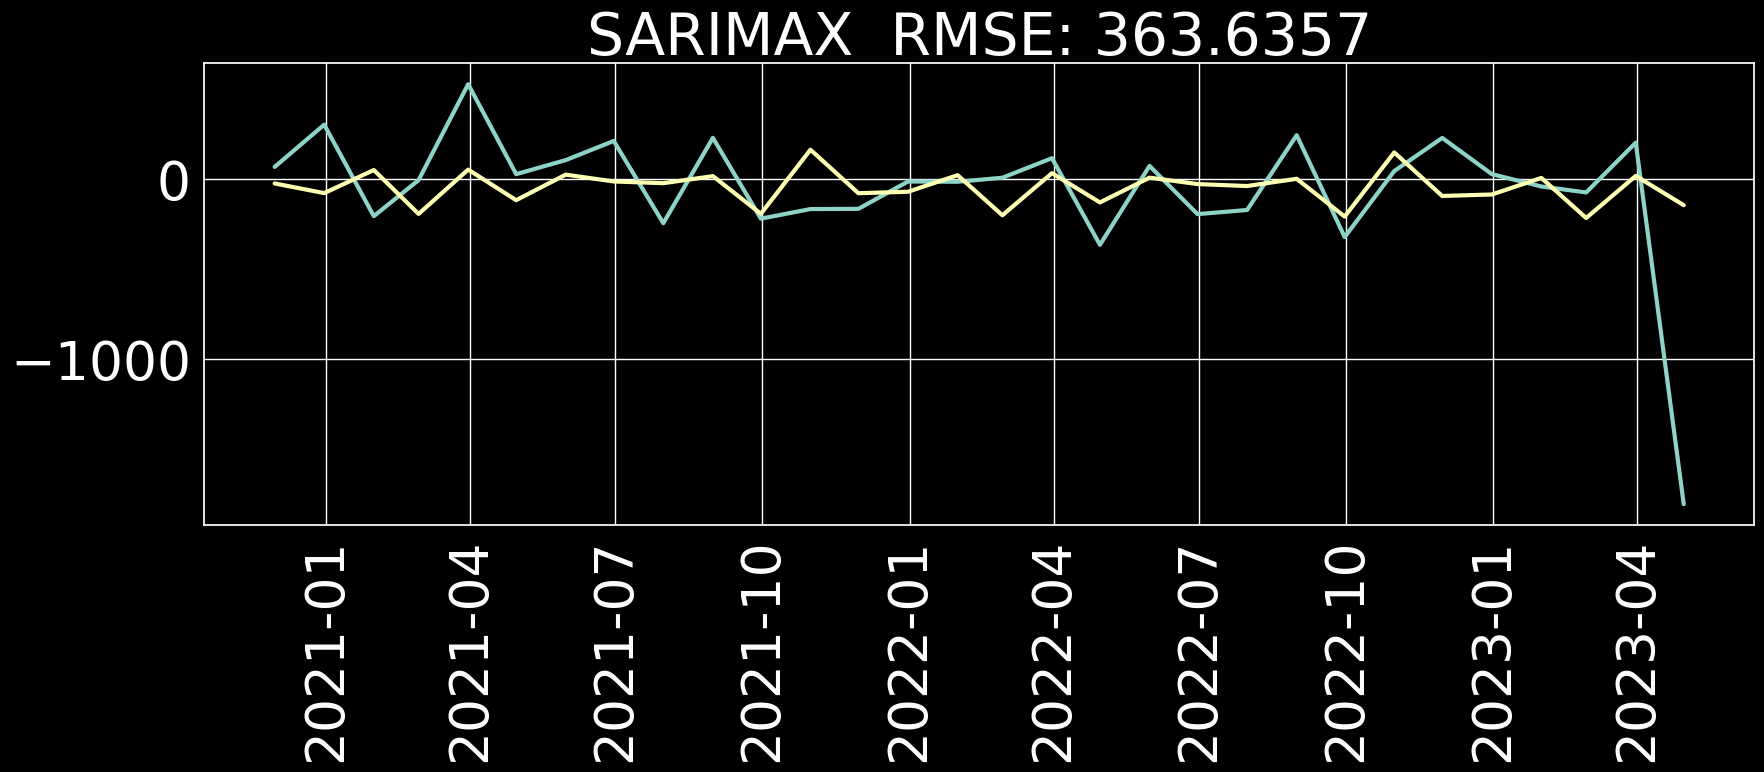

In [110]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,6)

plt.plot(test3, linewidth=3)
plt.plot(predictions2, linewidth=3)
plt.xticks(rotation ='vertical')
plt.title('SARIMAX  RMSE: %.4f'% rmse)


In [113]:
test.columns

Index(['High', 'High_First_Order_Differencing',
       'High_Second_Order_Differencing', 'Predicted_ARIMA'],
      dtype='object')

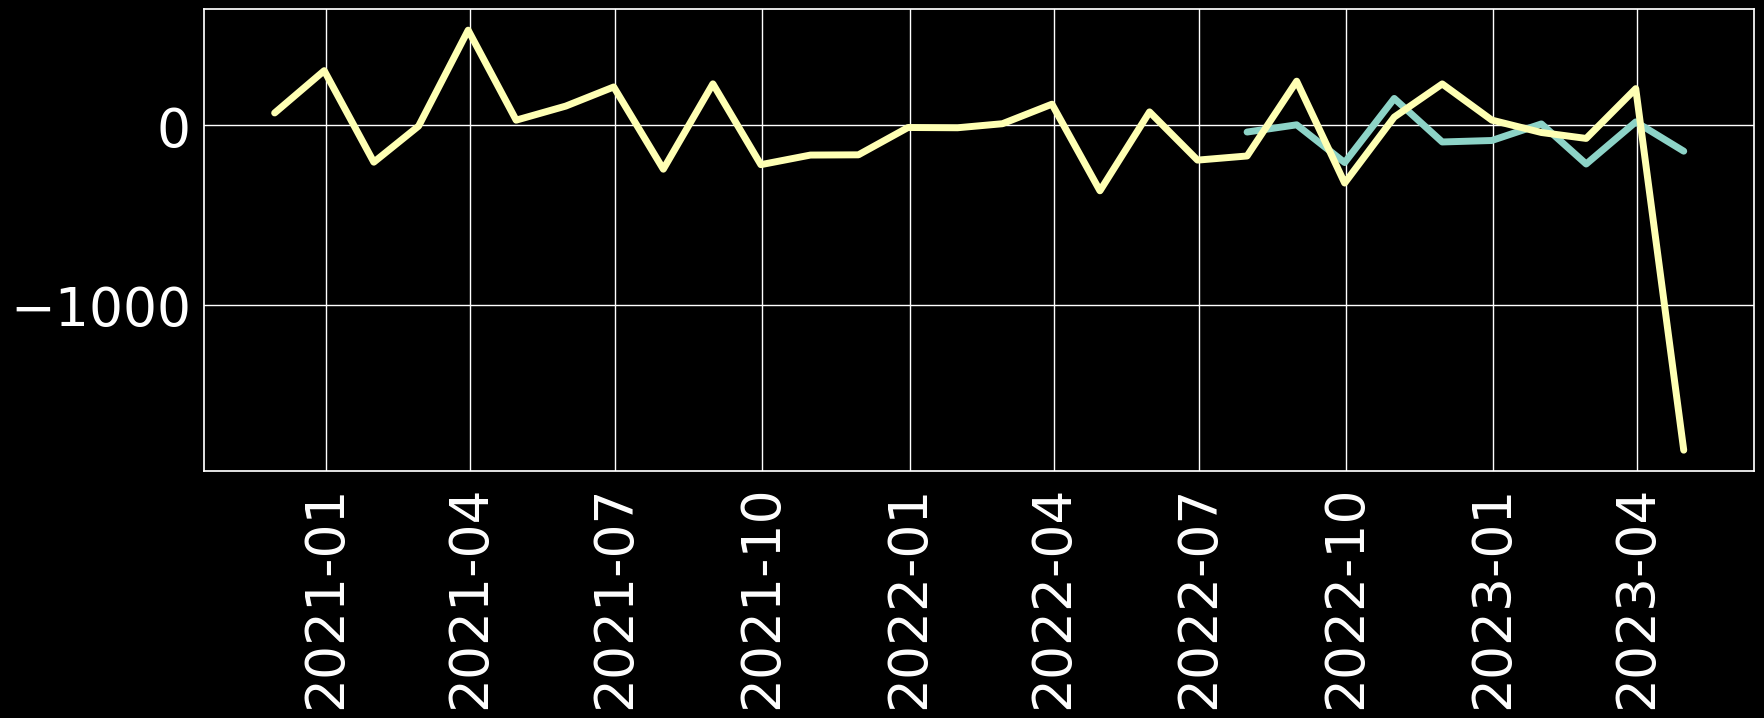

In [120]:
plt.rcParams["figure.figsize"] = (20,6)
#test['forecast']=model_auto_fit.predict(start=90,end=103,dynamic=True)
#test[['High_First_Order_Differencing','forecast']].plot(figsize=(16,5))

plt.plot(test["forecast"], linewidth=5)
plt.plot(test["High_First_Order_Differencing"], linewidth=5)
plt.xticks(rotation ='vertical')

plt.show()